In [1]:
import pandas as pd 
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [7]:
import numpy as np
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)
df[cols_with_missing] = df[cols_with_missing].fillna(df[cols_with_missing].median())
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
df['Outcome'].value_counts(normalize=True)


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [ ]:
neg, pos = (df['Outcome'] == 0).sum(), (df['Outcome'] == 1).sum()
scale_pos_weight = neg / pos

print("Negative samples (0):", neg)
print("Positive samples (1):", pos)
print("scale_pos_weight:", scale_pos_weight)


Negative samples (0): 500
Positive samples (1): 268
scale_pos_weight: 1.8656716417910448


C:\Users\91958\AppData\Local\Temp\ipykernel_18416\245686235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


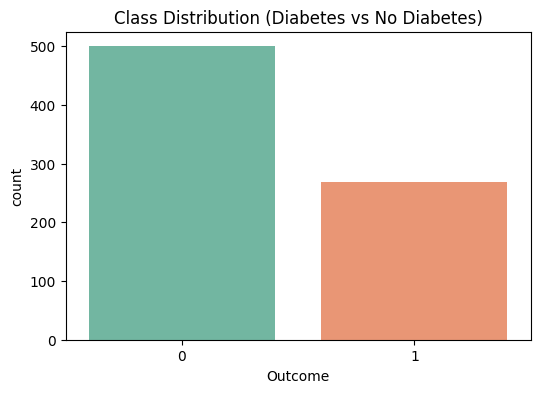

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Class Distribution (Diabetes vs No Diabetes)")
plt.show()

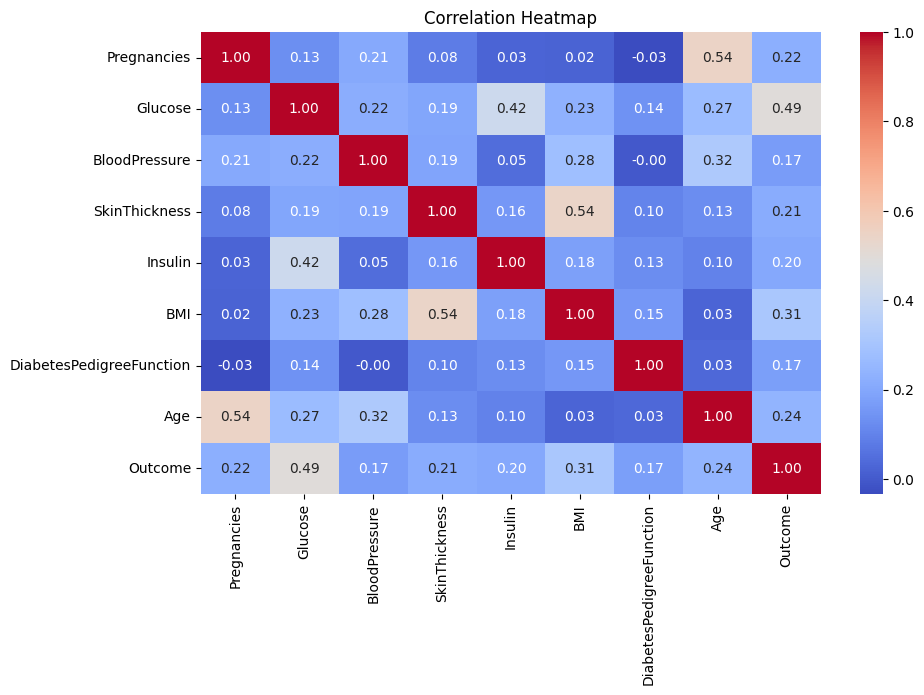

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

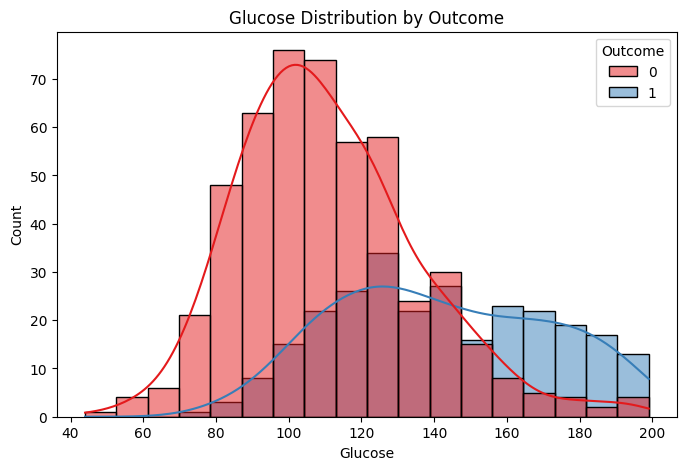

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True, palette="Set1")
plt.title("Glucose Distribution by Outcome")
plt.show()

C:\Users\91958\AppData\Local\Temp\ipykernel_18416\3960628001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Outcome", y="Glucose", palette="Set2")


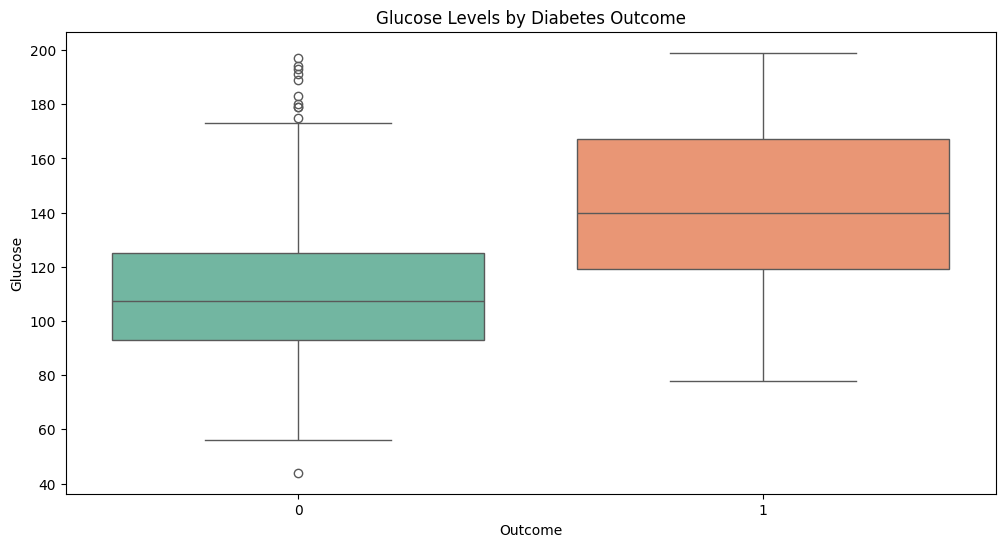

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Outcome", y="Glucose", palette="Set2")
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()

C:\Users\91958\AppData\Local\Temp\ipykernel_18416\3387522678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Outcome", y="BMI", palette="Set2")


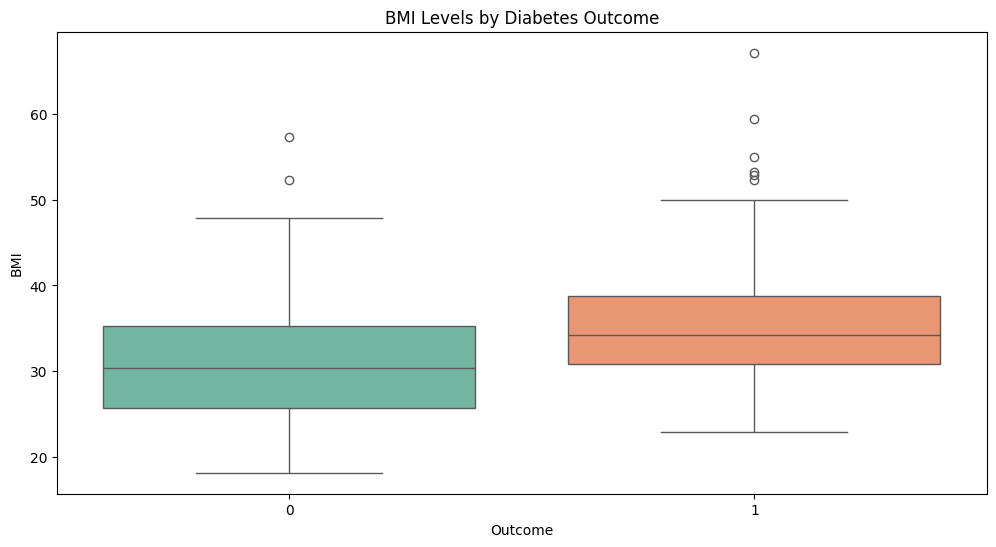

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Outcome", y="BMI", palette="Set2")
plt.title("BMI Levels by Diabetes Outcome")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(
    scale_pos_weight=1.8656716417910448,  # imbalance handling
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)


d:\diabetes\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [18]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import numpy as np
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

d:\diabetes\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\diabetes\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\diabetes\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\diabetes\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\d

Cross-validation scores: [0.72727273 0.73376623 0.71428571 0.76470588 0.73856209]
Mean Accuracy: 0.7357185298361769
Standard Deviation: 0.016630460439755395


In [20]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    scale_pos_weight=1.8656716417910448,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Cross-validation Score: 0.7591460826754945


d:\diabetes\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:45:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7402597402597403
Precision: 0.6458333333333334
Recall: 0.5740740740740741
F1-score: 0.6078431372549019
ROC-AUC: 0.8161111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154


Confusion Matrix:
 [[83 17]
 [23 31]]


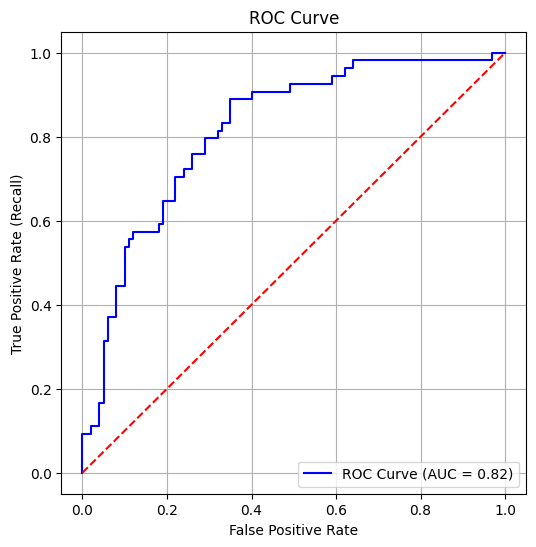

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [26]:
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as diabetes_model.pkl")

✅ Model trained and saved as diabetes_model.pkl
